In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#if you want to ignore the red warning (not an error warning)
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load dataset

df = pd.read_csv('Titanic.csv')

In [3]:
#preview dataset

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#info dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### DATA CLEANSING

In [5]:
#check missing value

missing_values = df.isnull().sum()
missing_percentages = (missing_values / len(df)) * 100
missing_info = pd.DataFrame({
    'Column' : missing_values.index,
    'Missing Values' : missing_values.values,
    'Missing Percentage' : missing_percentages.values
})

print(missing_info)

         Column  Missing Values  Missing Percentage
0   PassengerId               0            0.000000
1      Survived               0            0.000000
2        Pclass               0            0.000000
3          Name               0            0.000000
4           Sex               0            0.000000
5           Age             177           19.865320
6         SibSp               0            0.000000
7         Parch               0            0.000000
8        Ticket               0            0.000000
9          Fare               0            0.000000
10        Cabin             687           77.104377
11     Embarked               2            0.224467


HANDLING THE MISSING VALUES

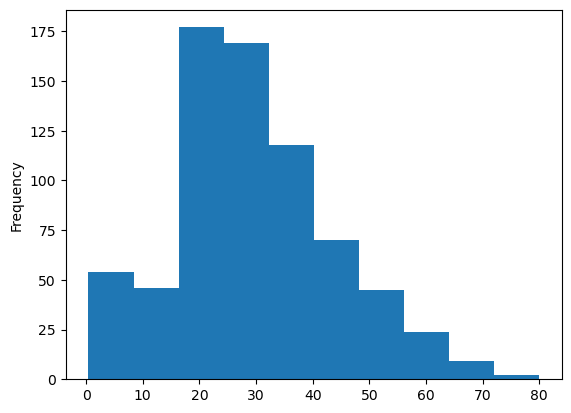

In [6]:
#show the visualization of Age column
df.Age.plot(kind='hist');

In [7]:
val = df.Age.median()
df['Age'] = df.Age.fillna(val)

In [8]:
#show the proportion of data

df.shape[0]

891

In [9]:
#check value counts for categorical data

df.value_counts(['Cabin', 'Embarked'])

Cabin        Embarked
C23 C25 C27  S           4
G6           S           4
B96 B98      S           4
F33          S           3
F2           S           3
                        ..
B94          S           1
B86          C           1
B82 B84      C           1
B80          C           1
T            S           1
Name: count, Length: 149, dtype: int64

NOTES:

From the data above, it can be concluded that the Cabin will be dropped because it is have an unique data & not enough to complete the data.

In [10]:
df.Cabin.value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [11]:
#drop the columns

df.drop('Cabin', axis=1, inplace = True)

In [12]:
df.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [13]:
val = df.Embarked.mode().values[0]
df['Embarked'] = df.Embarked.fillna(val)

In [14]:
#show the value counts again

df.Embarked.value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [15]:
#show the cleaning data

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


The dataset has cleaned!

### PIVOT TABLE

In [16]:
def make_pivot(param1, param2, param3) :
    df_slice = df[[param1, param2, param3, 'PassengerId']]
    slice_pivot = df_slice.pivot_table(index=[param1,param3], columns=[param2], \
                                       aggfunc=np.size,fill_value=0)
    p_chart = slice_pivot.plot(kind='bar');
    for p in p_chart.patches:
        p_chart.annotate(str(p.get_height()), (p.get_x() * 1.05, p.get_height() * 1.01))
        return slice_pivot
        return p_chart

PassengerId     
Sex                  female male
Survived Pclass                 
0        1                3   77
         2                6   91
         3               72  300
1        1               91   45
         2               70   17
         3               72   47

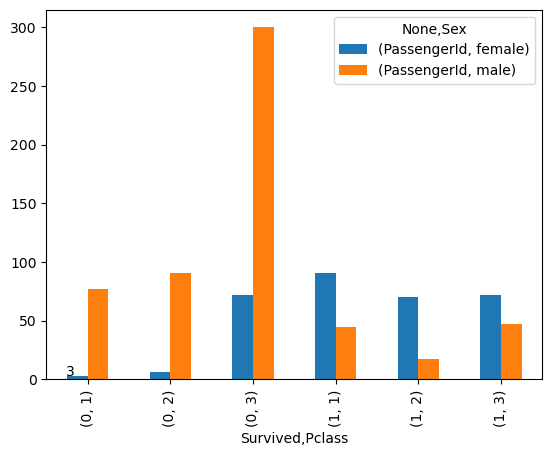

In [17]:
make_pivot('Survived', 'Sex', 'Pclass')

### INTERPRETATION

Based on the results of the graph, it can be concluded that the majority of passengers who survived on the Titanic when viewed based on passenger class and gender came from female passengers in the first class as many as 91 people. When viewed based on the number of victims who did not survive on the Titanic, came from male passengers in the third class, which is 300 people.